# Problem Description

**Sales Channel Prediction Case Study**

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The company has to select proper sales channel to predict the right sales channel to generate good revenue. 

# Importing Libraries 

In [163]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split ,  cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
import warnings 
warnings.filterwarnings('ignore')

In [164]:
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

# Getting Data

In [165]:
sdf = pd.read_csv('Advertising.csv')
sdf.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [166]:
sdf = sdf.drop(columns = 'Unnamed: 0' , axis = 1)
sdf

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Data Analysis

In [167]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [168]:
np.round(sdf.describe(),2)

,TV,radio,newspaper,sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


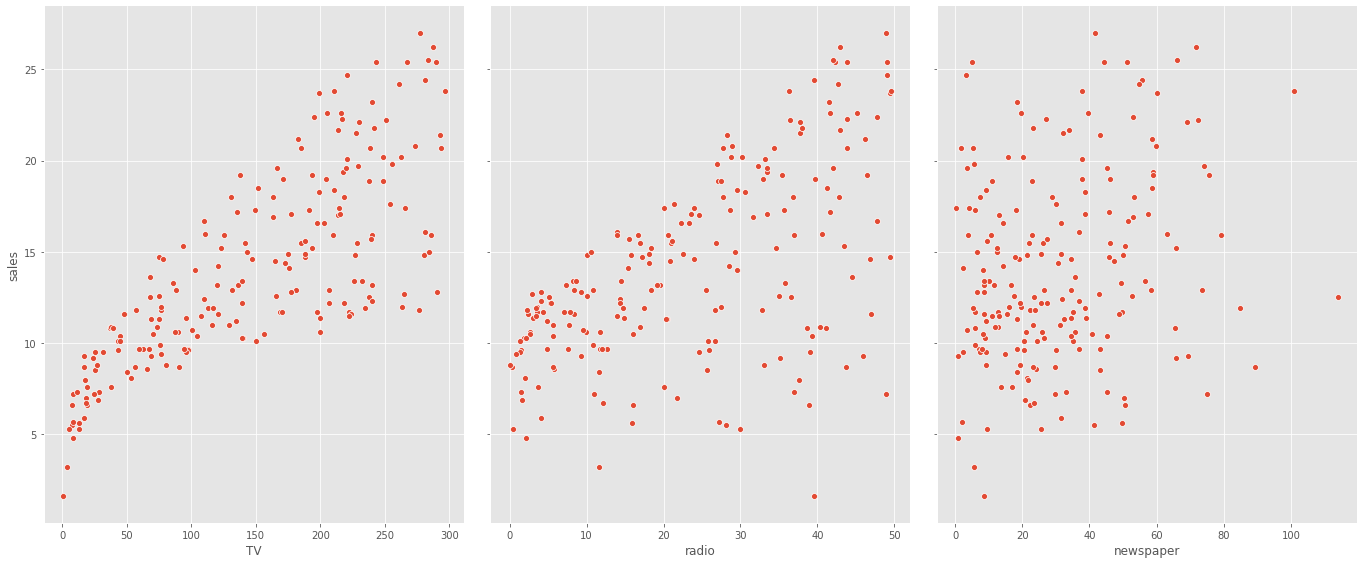

In [169]:
sns.pairplot(sdf, x_vars=['TV','radio','newspaper'], y_vars='sales', height = 8 , aspect = 0.8);

**Finding and Plotting the correlation in between different features**

In [170]:
corr_matrix = sdf.corr()
corr_matrix['sales'].sort_values(ascending = False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

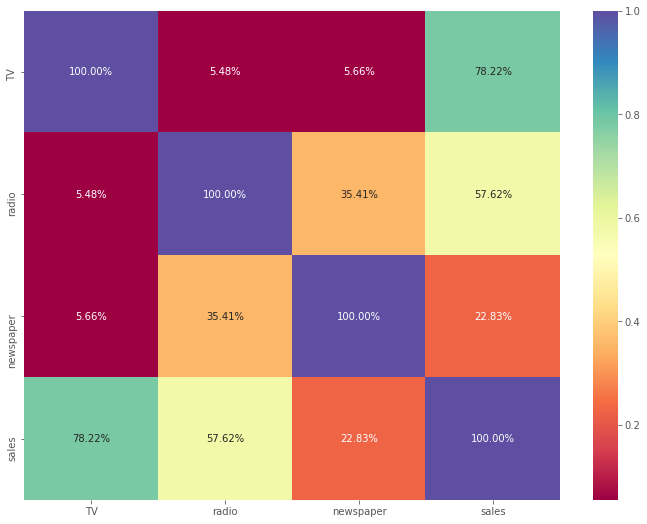

In [171]:
plt.figure(figsize = (12,9))
sns.heatmap(sdf.corr() , annot = True ,fmt = '.2%' , cmap = 'Spectral', )

**Boxplot for visualising Outliers**

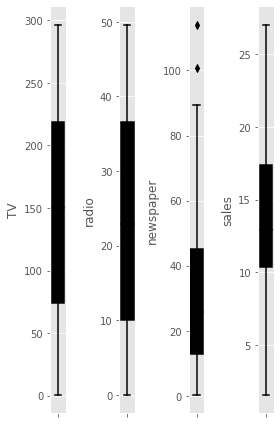

In [172]:
collist=sdf.columns.values
ncol=4
nrows=1
plt.figure(figsize=(4,6))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(sdf[collist[i]],color='black',orient='v')
    plt.tight_layout()

In [173]:
sdf

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


**Finding Z Score**

In [174]:
from scipy.stats import zscore
z_score=np.abs(zscore(sdf))
sdf = sdf[(z_score < 3).all(axis = 1)]

In [175]:
sdf

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


**Removing Outliers**

In [176]:
x = sdf.drop('sales',axis = 1)
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [177]:
y = sdf['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

**Checking for skewness & Plotting them**

In [178]:
x.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
dtype: float64

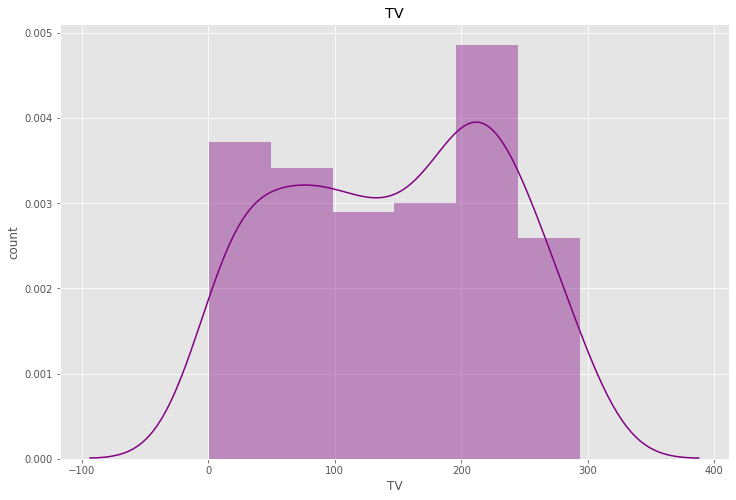

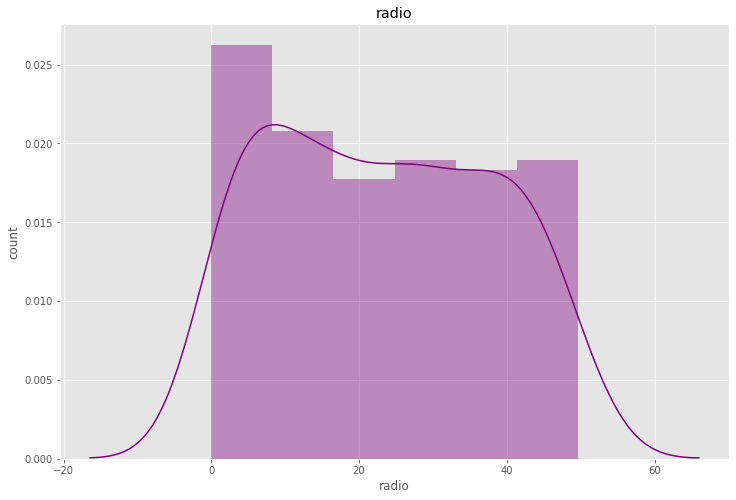

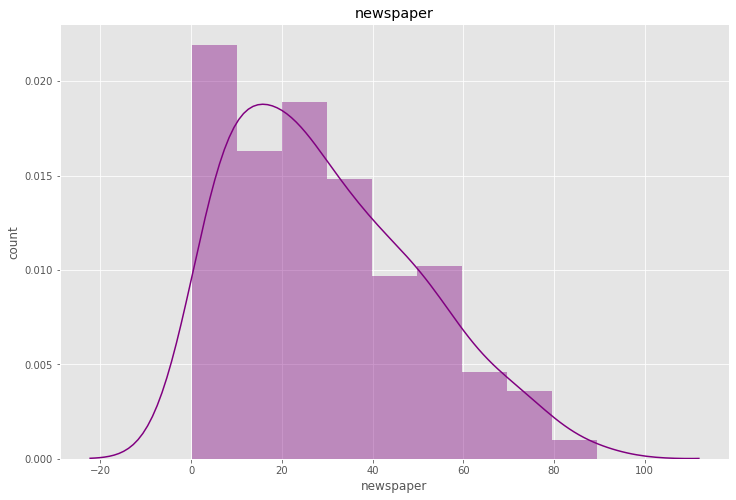

In [179]:
for feature in x :
    sns.distplot(x[feature] , kde = True , color = 'Purple' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

Here we can find that there is skewness in the newspaper column so we'll transform it .

In [180]:
from sklearn.preprocessing import power_transform
x_t=power_transform(x , method = 'yeo-johnson' )
x_t=pd.DataFrame(x_t,columns=x.columns)
x_t

,TV,radio,newspaper
0,0.955983,0.969110,1.604196
1,-1.192003,1.046234,0.831044
2,-1.646125,1.372968,1.607052
3,0.142934,1.147332,1.283768
4,0.456452,-0.735026,1.280622
...,...,...,...
193,-1.288311,-1.423941,-0.687435
194,-0.521579,-1.287689,-1.146090
195,0.416577,-0.862474,-1.314437
196,1.467535,1.182269,1.517395


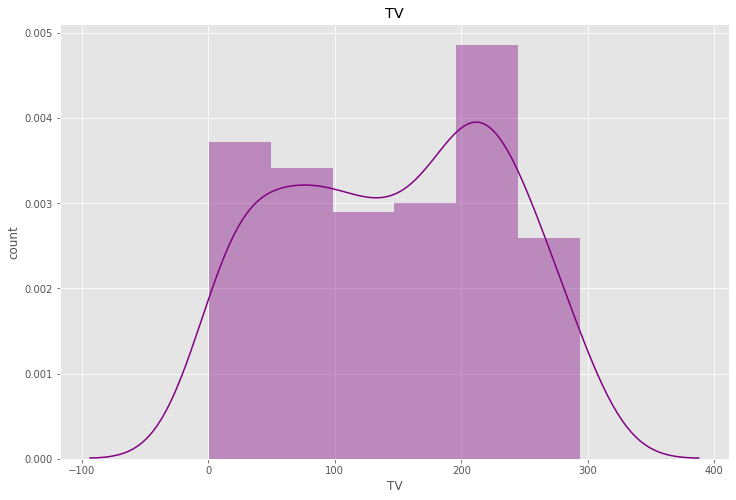

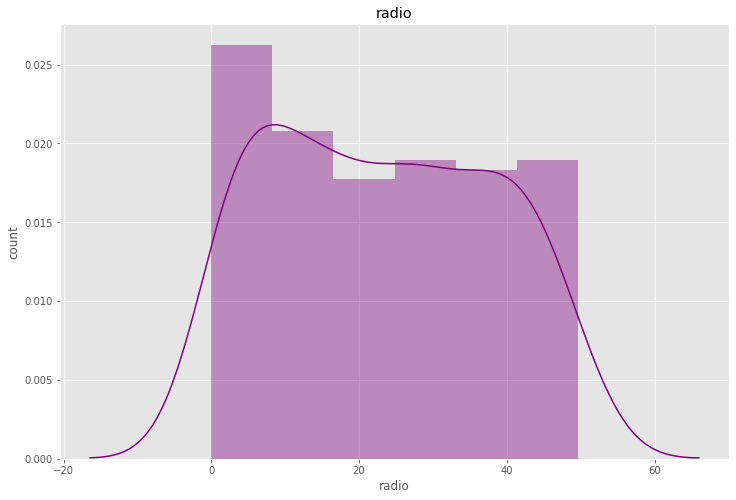

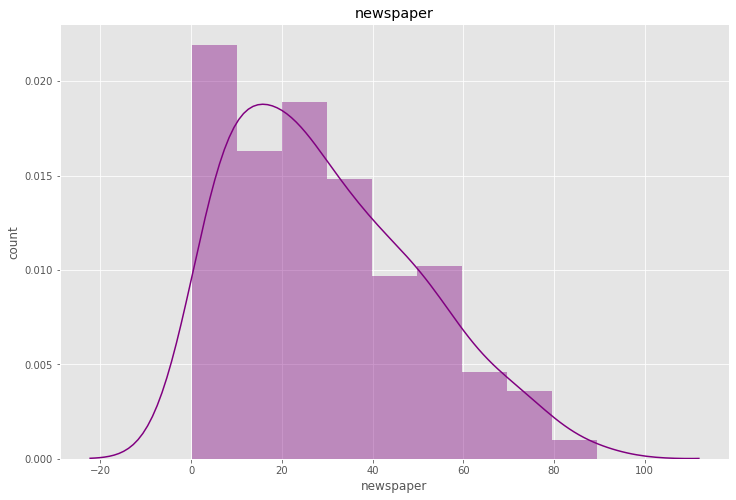

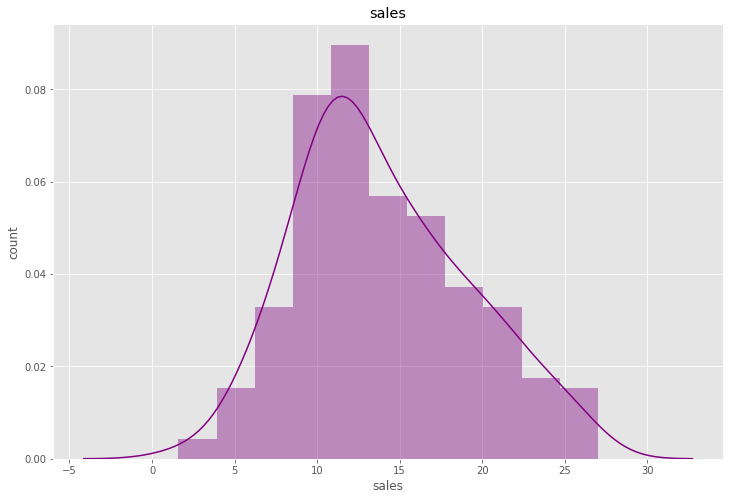

In [181]:
for feature in sdf :
    sns.distplot(sdf[feature] , kde = True , color = 'Purple' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

In [182]:
x.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
dtype: float64

From above we can see that skewness is removed from the dataset . 

# Machine Learning Models 

**Finding the best model for our data Predictions**

In [185]:
X_train, X_test, y_train, y_test = train_test_split(x_t, y, train_size=0.7, test_size=0.3, random_state=2)

model_reg = [RandomForestRegressor, SVR, DecisionTreeRegressor,KNeighborsRegressor, LinearRegression]


for model in model_reg:
    m = model()
    print('\n''Model: ',m)
    m.fit(X_train, y_train)
    scr=(m.score(X_train,y_train))
    print('\n''-->''Score:',scr)
    scr_cross=cross_val_score(m,x,y,cv=5)
    scr_mean=scr_cross.mean()
    print('Cross validation score: ',scr_mean)
    print('Difference between accuracy and cross validation score: ', scr-scr_mean)
    pred = m.predict(x_test)
    print('Mean Absolute Error: ',mae(y_test, pred))


Model:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

-->Score: 0.9948857408646794
Cross validation score:  0.9728277573562206
Difference between accuracy and cross validation score:  0.02205798350845878
Mean Absolute Error:  4.399166666666667

Model:  SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

-->Score: 0.9310750026212263
Cross validation score:  -0.0542717989236924
Difference between accuracy and cross validation score:  0.9853468015449187
Mean Absol

From above we can see that KNeighbors has the least difference between accuracy and cross val score , so we'll use this for our future predictions .

**K Neighbors Regressor**

In [186]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [187]:
y_predicted = knn.predict(X_test)

**Creating a Dataframe and saving the y_test and y_predicted values**

In [188]:
d = {'y_test' : y_test , 'y_predicted':y_predicted }
t_v_p = pd.DataFrame(d)
t_v_p

,y_test,y_predicted
114,14.6,14.40
30,21.4,21.92
182,8.7,7.78
168,17.1,16.38
193,19.6,20.36
86,12.0,11.40
10,8.6,8.82
55,23.7,22.06
117,9.4,8.72
36,25.4,20.86


In [189]:
t_v_p.to_csv('Advertisement Knn Predictions')

**Checking for errors**

In [190]:
print("Error : ")


print('Mean absolute error : ', mean_absolute_error(y_test,y_predicted))


print('Mean squared error : ', mean_squared_error(y_test,y_predicted))


print('Root mean squared error : ', np.sqrt(mean_squared_error(y_test,y_predicted)))

Error : 
Mean absolute error :  1.0880000000000005
Mean squared error :  2.5110800000000006
Root mean squared error :  1.5846387600964456


**Finding the R2 score** 

R2 score tells us how much our prediction is correct

In [191]:
from sklearn.metrics import r2_score
print(r2_score(y_test, pred))

-0.17662878564708118


In [192]:
import joblib
joblib.dump(knn,'Sales.obj')

['Sales.obj']